In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from PIL import Image,ImageEnhance
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedgobara/osteoporosis-database")

print("Path to dataset files:", path)

Path to dataset files: /Users/atharvadumbre/.cache/kagglehub/datasets/mohamedgobara/osteoporosis-database/versions/1


In [22]:
data = r'/Users/atharvadumbre/.cache/kagglehub/datasets/mohamedgobara/osteoporosis-database/versions/1'

In [23]:
data = pd.read_excel(r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Patient Data/patient details.xlsx')

In [24]:
data

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,Number of Pregnancies,Seizer Disorder,Estrogen Use,Occupation,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1.0,OP1,yes,male,65.000000,NaN,1.645920,65.000000,yes,no,no,no,NaN,no,no,shopkeeper,no,no,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2.0,OP2,yes,female,54.000000,46,1.676400,78.000000,no,no,no,no,3.0,no,no,h.wife,no,no,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3.0,OP3,yes,female,49.000000,43,1.371600,59.000000,no,no,no,yes,3.0,no,no,h.wife,l.leg,no,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4.0,OP4,yes,female,57.000000,40,1.524000,72.000000,no,no,no,yes,3.0,no,no,teacher,no,no,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5.0,OP5,yes,female,40.000000,NaN,1.493520,54.000000,no,no,no,no,3.0,no,no,h.wife,no,no,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239.0,OP154,yes,female,56.000000,48,1.520000,68.000000,no,no,no,no,6.0,no,no,h.wife,no,no,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia
239,240.0,N37,yes,male,39.000000,NaN,1.630000,70.000000,no,no,no,no,NaN,no,no,bussinesman,knee fracture,no,no,5.0,low salt,no,-0.76,-0.59,26.346494,knee,over weight,normal
240,NaN,NaN,NaN,NaN,107.000000,max,1.828800,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,17.000000,min,1.371600,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
last_column = data.columns[-1]
df = data[[last_column] + list(data.columns[:-1])]

In [26]:
df
pd.set_option('display.max_columns', None)

In [27]:
# column names normalization

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [28]:
df

,diagnosis,s.no,patient_id,joint_pain:,gender,age,menopause_age,height__(meter),weight_(kg)_,smoker,alcoholic,diabetic,hypothyroidism,number_of_pregnancies,seizer_disorder,estrogen_use,occupation_,history_of_fracture,dialysis:,family_history_of_osteoporosis,maximum_walking_distance_(km),daily_eating_habits,medical_history,t-score_value,z-score_value,bmi:_,site,obesity
0,osteopenia,1.0,OP1,yes,male,65.000000,NaN,1.645920,65.000000,yes,no,no,no,NaN,no,no,shopkeeper,no,no,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight
1,osteopenia,2.0,OP2,yes,female,54.000000,46,1.676400,78.000000,no,no,no,no,3.0,no,no,h.wife,no,no,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight
2,osteopenia,3.0,OP3,yes,female,49.000000,43,1.371600,59.000000,no,no,no,yes,3.0,no,no,h.wife,l.leg,no,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity
3,osteopenia,4.0,OP4,yes,female,57.000000,40,1.524000,72.000000,no,no,no,yes,3.0,no,no,teacher,no,no,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity
4,osteopenia,5.0,OP5,yes,female,40.000000,NaN,1.493520,54.000000,no,no,no,no,3.0,no,no,h.wife,no,no,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,osteopenia,239.0,OP154,yes,female,56.000000,48,1.520000,68.000000,no,no,no,no,6.0,no,no,h.wife,no,no,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight
239,normal,240.0,N37,yes,male,39.000000,NaN,1.630000,70.000000,no,no,no,no,NaN,no,no,bussinesman,knee fracture,no,no,5.0,low salt,no,-0.76,-0.59,26.346494,knee,over weight
240,NaN,NaN,NaN,NaN,NaN,107.000000,max,1.828800,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,NaN,17.000000,min,1.371600,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.columns

Index(['diagnosis', 's.no', 'patient_id', 'joint_pain:', 'gender', 'age',
       'menopause_age', 'height__(meter)', 'weight_(kg)_', 'smoker',
       'alcoholic', 'diabetic', 'hypothyroidism', 'number_of_pregnancies',
       'seizer_disorder', 'estrogen_use', 'occupation_', 'history_of_fracture',
       'dialysis:', 'family_history_of_osteoporosis',
       'maximum_walking_distance_(km)', 'daily_eating_habits',
       'medical_history', 't-score_value', 'z-score_value', 'bmi:_', 'site',
       'obesity'],
      dtype='object')

In [30]:
df['diagnosis'] = df['diagnosis'].replace({'osteopenia':'osteoporosis'})

In [31]:
df['diagnosis']=df['diagnosis'].map({'osteoporosis':1,'normal':0})

In [32]:
df.head()

,diagnosis,s.no,patient_id,joint_pain:,gender,age,menopause_age,height__(meter),weight_(kg)_,smoker,alcoholic,diabetic,hypothyroidism,number_of_pregnancies,seizer_disorder,estrogen_use,occupation_,history_of_fracture,dialysis:,family_history_of_osteoporosis,maximum_walking_distance_(km),daily_eating_habits,medical_history,t-score_value,z-score_value,bmi:_,site,obesity
0,1.0,1.0,OP1,yes,male,65.0,NaN,1.64592,65.0,yes,no,no,no,NaN,no,no,shopkeeper,no,no,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight
1,1.0,2.0,OP2,yes,female,54.0,46,1.67640,78.0,no,no,no,no,3.0,no,no,h.wife,no,no,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight
2,1.0,3.0,OP3,yes,female,49.0,43,1.37160,59.0,no,no,no,yes,3.0,no,no,h.wife,l.leg,no,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity
3,1.0,4.0,OP4,yes,female,57.0,40,1.52400,72.0,no,no,no,yes,3.0,no,no,teacher,no,no,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity
4,1.0,5.0,OP5,yes,female,40.0,NaN,1.49352,54.0,no,no,no,no,3.0,no,no,h.wife,no,no,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight


In [33]:
df.info

<bound method DataFrame.info of      diagnosis   s.no patient_id joint_pain:  gender         age  \
0          1.0    1.0        OP1         yes    male   65.000000   
1          1.0    2.0        OP2         yes  female   54.000000   
2          1.0    3.0        OP3         yes  female   49.000000   
3          1.0    4.0        OP4         yes  female   57.000000   
4          1.0    5.0        OP5         yes  female   40.000000   
..         ...    ...        ...         ...     ...         ...   
238        1.0  239.0      OP154         yes  female   56.000000   
239        0.0  240.0        N37         yes    male   39.000000   
240        NaN    NaN        NaN         NaN     NaN  107.000000   
241        NaN    NaN        NaN         NaN     NaN   17.000000   
242        NaN    NaN        NaN         NaN     NaN   51.045833   

    menopause_age  height__(meter)  weight_(kg)_ smoker alcoholic diabetic  \
0             NaN         1.645920     65.000000    yes        no       n

In [34]:
df.drop(['s.no', 'patient_id','daily_eating_habits','site','occupation_','alcoholic'], axis = 1, inplace = True)


In [35]:
df.describe()

,diagnosis,age,height__(meter),weight_(kg)_,number_of_pregnancies,maximum_walking_distance_(km),t-score_value,z-score_value,bmi:_
count,240.000000,243.000000,243.000000,243.000000,124.000000,239.000000,240.000000,240.000000,240.000000
mean,0.845833,51.135991,1.585779,69.053738,3.443548,1.940167,-1.833625,-1.327292,27.590448
std,0.361863,13.231022,0.097444,9.885774,1.466717,1.991257,0.687243,0.675927,4.043308
min,0.000000,17.000000,1.371600,39.000000,1.000000,0.100000,-2.990000,-2.990000,16.139658
25%,1.000000,44.500000,1.520000,63.000000,2.000000,0.500000,-2.322500,-1.820000,24.956260
50%,1.000000,50.000000,1.570000,69.000000,3.000000,1.000000,-2.010000,-1.190000,27.285722
75%,1.000000,60.000000,1.655000,74.500000,4.000000,3.000000,-1.287500,-0.852500,30.210129
max,1.000000,107.000000,1.828800,98.000000,7.000000,10.000000,-0.160000,0.730000,42.754389


In [36]:
# Check for categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['number']).columns

print("Categorical Columns:", len(categorical_columns))
print("Numerical Columns:", len(numerical_columns))

Categorical Columns: 19
Numerical Columns: 9


Feature Engineering and Visualization

In [37]:
# Replace all values in 'medical_history' column with 'yes', except for 'no'
df['medical_history'] = df['medical_history'].apply(lambda x: 'yes' if x != 'no' else 'no')

# Check the transformation
print(df['medical_history'].value_counts())

medical_history
yes    130
no     113
Name: count, dtype: int64


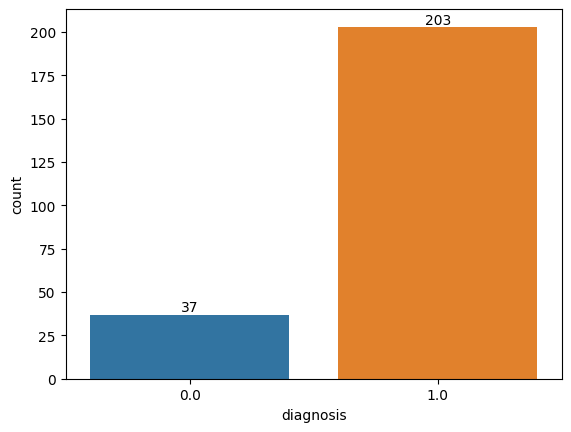

In [38]:
# check the independent varible

target_check = sns.countplot(data=df, x='diagnosis')

# Adding  data labels to have idea of the distribution
for p in target_check.patches:
    target_check.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

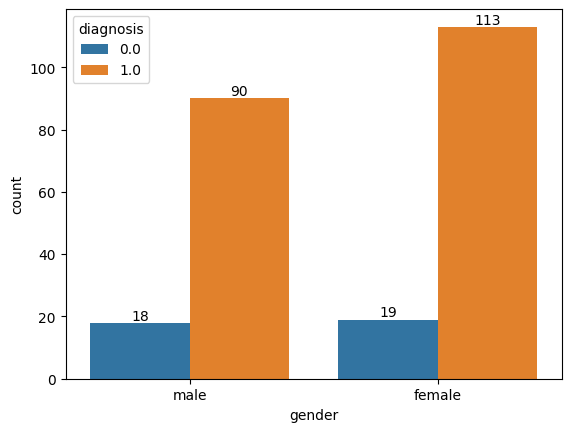

In [39]:
# observing the relationship between gender and my target variable

gender_target = sns.countplot(data = df,x = 'gender',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in gender_target.patches:
    gender_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

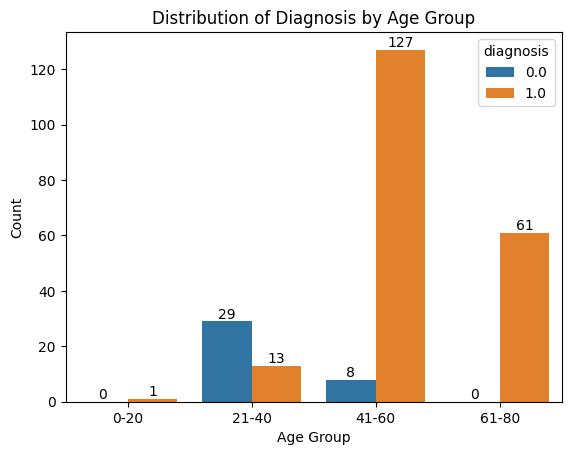

In [40]:
# Create age bins and labels
age_bins = [0, 20, 40, 60, 80]  # Adjust these ranges as per your data
age_labels = ['0-20', '21-40', '41-60', '61-80']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Create a count plot with 'age_bin' and 'diagnosis'
age_target = sns.countplot(data=df, x='age_bin', hue='diagnosis')

# Adding data labels to show the count in each bin for each hue
for p in age_target.patches:
    age_target.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis by Age Group')

# Show the plot
plt.show()

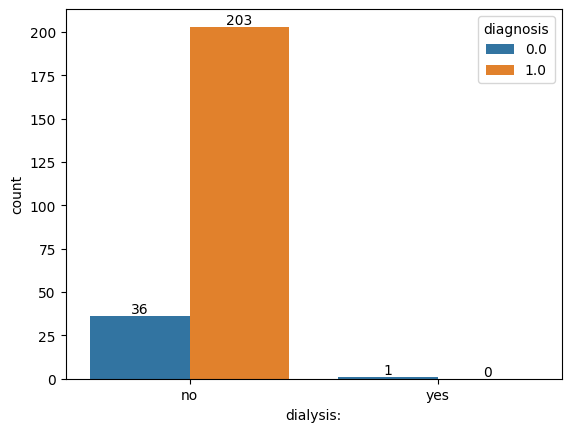

In [41]:
# checking dialysis feature

vis = sns.countplot(data = df,x = 'dialysis:',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

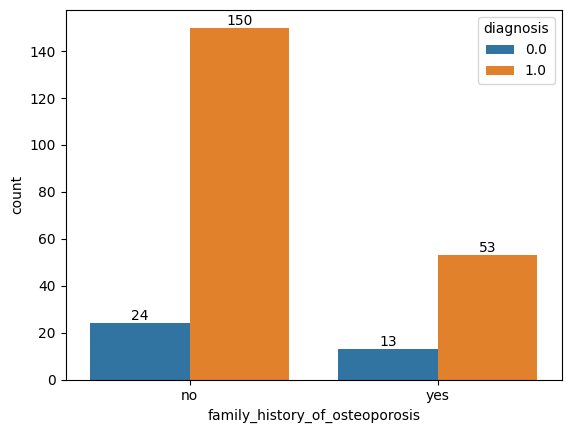

In [42]:
vis = sns.countplot(data = df,x = 'family_history_of_osteoporosis',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

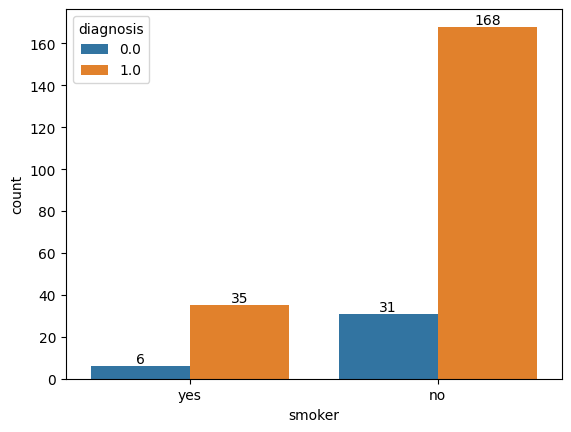

In [43]:
vis = sns.countplot(data = df,x = 'smoker',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

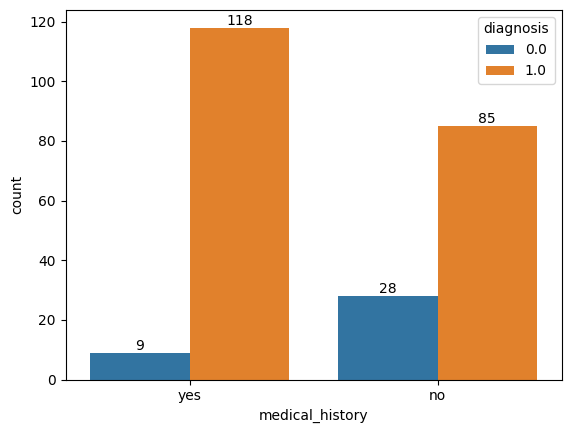

In [44]:
vis = sns.countplot(data = df,x = 'medical_history',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

In [45]:
df['diabetic'].value_counts()

diabetic
no     228
yes     12
Name: count, dtype: int64

In [46]:
df

,diagnosis,joint_pain:,gender,age,menopause_age,height__(meter),weight_(kg)_,smoker,diabetic,hypothyroidism,number_of_pregnancies,seizer_disorder,estrogen_use,history_of_fracture,dialysis:,family_history_of_osteoporosis,maximum_walking_distance_(km),medical_history,t-score_value,z-score_value,bmi:_,obesity,age_bin
0,1.0,yes,male,65.000000,NaN,1.645920,65.000000,yes,no,no,NaN,no,no,no,no,no,0.2,yes,-1.98,0.73,23.993627,normal weight,61-80
1,1.0,yes,female,54.000000,46,1.676400,78.000000,no,no,no,3.0,no,no,no,no,no,1.0,yes,-2.26,-2.71,27.754876,over weight,41-60
2,1.0,yes,female,49.000000,43,1.371600,59.000000,no,no,yes,3.0,no,no,l.leg,no,no,1.0,no,-1.92,-1.51,31.361517,obesity,41-60
3,1.0,yes,female,57.000000,40,1.524000,72.000000,no,no,yes,3.0,no,no,no,no,no,2.0,yes,-2.23,-1.13,31.000062,obesity,41-60
4,1.0,yes,female,40.000000,NaN,1.493520,54.000000,no,no,no,3.0,no,no,no,no,no,2.0,yes,-1.81,-1.05,24.208711,normal weight,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1.0,yes,female,56.000000,48,1.520000,68.000000,no,no,no,6.0,no,no,no,no,yes,0.2,yes,-2.01,-1.13,29.432133,overweight,41-60
239,0.0,yes,male,39.000000,NaN,1.630000,70.000000,no,no,no,NaN,no,no,knee fracture,no,no,5.0,no,-0.76,-0.59,26.346494,over weight,21-40
240,NaN,NaN,NaN,107.000000,max,1.828800,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,17.000000,min,1.371600,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,0-20


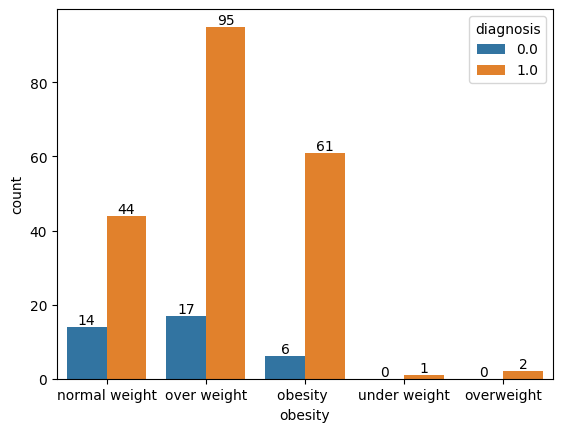

In [47]:
vis = sns.countplot(data = df,x = 'obesity',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

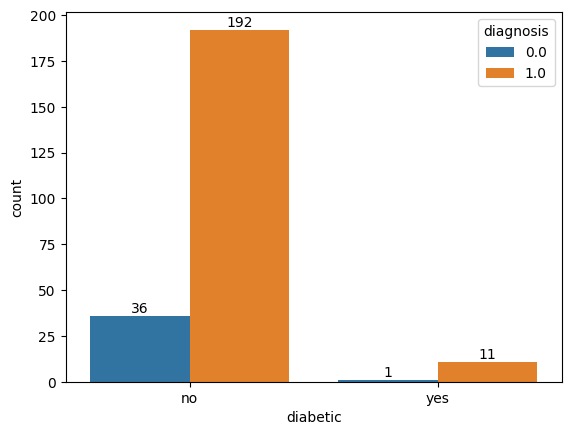

In [49]:
vis = sns.countplot(data = df,x = 'diabetic',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

In [50]:
df['history_of_fracture'] = df['history_of_fracture'].apply(lambda x: 'yes' if x != 'no' else 'no')

# Check the transformation
print(df['history_of_fracture'].value_counts())

history_of_fracture
no     169
yes     74
Name: count, dtype: int64


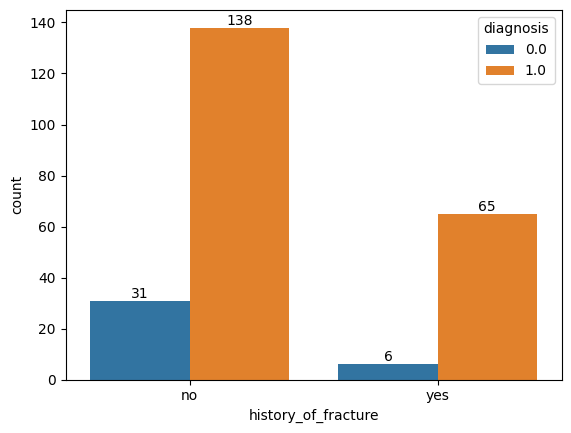

In [51]:
vis = sns.countplot(data = df,x = 'history_of_fracture',hue = 'diagnosis')

# Adding a  data labels to have idea of our  target count in each feature
for p in vis.patches:
    vis.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center',  
        va='bottom' 
    )

In [52]:
df = df.drop(['age_bin'],axis = 1)

In [53]:
# Assuming df is your DataFrame and 'obesity' is one of the columns
df['obesity'] = df['obesity'].apply(lambda x: 'no' if x == 'normal weight' else 'yes')

# Check the transformation
print(df['obesity'].value_counts())

obesity
yes    185
no      58
Name: count, dtype: int64


In [54]:
# Mapping "Yes" to 1 and "No" to 0 in the relevant columns
df['joint_pain:'] = df['joint_pain:'].map({'yes': 1, 'no': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['diabetic'] = df['diabetic'].map({'yes': 1, 'no': 0})
df['hypothyroidism'] = df['hypothyroidism'].map({'yes': 1, 'no': 0})
df['seizer_disorder'] = df['seizer_disorder'].map({'yes': 1, 'no': 0})
df['dialysis:'] = df['dialysis:'].map({'yes': 1, 'no': 0})
df['family_history_of_osteoporosis'] = df['family_history_of_osteoporosis'].map({'yes': 1, 'no': 0})
df['estrogen_use'] = df['estrogen_use'].map({'yes': 1, 'no': 0})
df['history_of_fracture'] = df['history_of_fracture'].map({'yes': 1, 'no': 0})
df['medical_history'] = df['medical_history'].map({'yes': 1, 'no': 0})
df['obesity'] = df['obesity'].map({'yes': 1, 'no': 0})

# Mapping "Male" to 1 and "Female" to 0 in the relevant column
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

In [55]:
# Remove rows where 'menopause_age' is 'max', 'avg', or 'min'
df = df[~df['menopause_age'].isin(['max', 'avg', 'min'])]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   diagnosis                       240 non-null    float64
 1   joint_pain:                     240 non-null    float64
 2   gender                          240 non-null    float64
 3   age                             240 non-null    float64
 4   menopause_age                   83 non-null     object 
 5   height__(meter)                 240 non-null    float64
 6   weight_(kg)_                    240 non-null    float64
 7   smoker                          240 non-null    float64
 8   diabetic                        240 non-null    float64
 9   hypothyroidism                  240 non-null    float64
 10  number_of_pregnancies           124 non-null    float64
 11  seizer_disorder                 240 non-null    float64
 12  estrogen_use                    240 non-n

In [57]:
df.head()

,diagnosis,joint_pain:,gender,age,menopause_age,height__(meter),weight_(kg)_,smoker,diabetic,hypothyroidism,number_of_pregnancies,seizer_disorder,estrogen_use,history_of_fracture,dialysis:,family_history_of_osteoporosis,maximum_walking_distance_(km),medical_history,t-score_value,z-score_value,bmi:_,obesity
0,1.0,1.0,1.0,65.0,NaN,1.64592,65.0,1.0,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.2,1,-1.98,0.73,23.993627,0
1,1.0,1.0,0.0,54.0,46,1.67640,78.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0.0,0.0,1.0,1,-2.26,-2.71,27.754876,1
2,1.0,1.0,0.0,49.0,43,1.37160,59.0,0.0,0.0,1.0,3.0,0.0,0.0,1,0.0,0.0,1.0,0,-1.92,-1.51,31.361517,1
3,1.0,1.0,0.0,57.0,40,1.52400,72.0,0.0,0.0,1.0,3.0,0.0,0.0,0,0.0,0.0,2.0,1,-2.23,-1.13,31.000062,1
4,1.0,1.0,0.0,40.0,NaN,1.49352,54.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0.0,0.0,2.0,1,-1.81,-1.05,24.208711,0


In [59]:
df.isna().sum()

diagnosis                           0
joint_pain:                         0
gender                              0
age                                 0
menopause_age                     157
height__(meter)                     0
weight_(kg)_                        0
smoker                              0
diabetic                            0
hypothyroidism                      0
number_of_pregnancies             116
seizer_disorder                     0
estrogen_use                        0
history_of_fracture                 0
dialysis:                           0
family_history_of_osteoporosis      0
maximum_walking_distance_(km)       1
medical_history                     0
t-score_value                       0
z-score_value                       0
bmi:_                               0
obesity                             0
dtype: int64

In [60]:
# Fill missing values (NaN) with the mean
df['menopause_age'] = df['menopause_age'].fillna(df['menopause_age'].mean())
df['number_of_pregnancies'] = df['number_of_pregnancies'].fillna(df['number_of_pregnancies'].mean())
df['maximum_walking_distance_(km)'] = df['maximum_walking_distance_(km)'].fillna(df['maximum_walking_distance_(km)'].mean())

In [62]:
df.isna().sum()

diagnosis                         0
joint_pain:                       0
gender                            0
age                               0
menopause_age                     0
height__(meter)                   0
weight_(kg)_                      0
smoker                            0
diabetic                          0
hypothyroidism                    0
number_of_pregnancies             0
seizer_disorder                   0
estrogen_use                      0
history_of_fracture               0
dialysis:                         0
family_history_of_osteoporosis    0
maximum_walking_distance_(km)     0
medical_history                   0
t-score_value                     0
z-score_value                     0
bmi:_                             0
obesity                           0
dtype: int64

In [58]:
correlation = df.corr()
correlation

,diagnosis,joint_pain:,gender,age,menopause_age,height__(meter),weight_(kg)_,smoker,diabetic,hypothyroidism,number_of_pregnancies,seizer_disorder,estrogen_use,history_of_fracture,dialysis:,family_history_of_osteoporosis,maximum_walking_distance_(km),medical_history,t-score_value,z-score_value,bmi:_,obesity
diagnosis,1.000000,-0.039136,-0.031311,0.564020,0.081763,-0.067806,0.095596,0.009836,0.045001,0.041086,0.302142,0.079278,0.038393,0.125034,-0.151512,-0.073002,-0.061202,0.244553,-0.738673,-0.390022,0.143844,0.136339
joint_pain:,-0.039136,1.000000,-0.009213,0.047640,NaN,-0.089897,-0.109776,0.041609,0.021031,0.037242,0.027378,0.017023,0.020091,0.059417,0.005930,-0.046193,-0.032816,0.005357,0.023575,0.093463,-0.020478,-0.051749
gender,-0.031311,-0.009213,1.000000,0.338484,NaN,0.631198,0.127718,0.501811,0.023057,-0.103278,0.034347,-0.167968,-0.198246,-0.054133,0.071512,-0.069401,0.383161,-0.203867,-0.037351,-0.103711,-0.405988,-0.311071
age,0.564020,0.047640,0.338484,1.000000,0.541853,0.061880,0.028611,0.268183,0.140322,-0.066935,0.354044,-0.087289,-0.092544,0.124477,-0.066996,-0.131149,0.004111,0.083623,-0.744357,-0.238454,-0.031458,-0.108446
menopause_age,0.081763,NaN,NaN,0.541853,1.000000,-0.268661,-0.244080,NaN,0.078736,-0.221335,0.151636,-0.212012,-0.230149,-0.040675,NaN,0.210006,-0.034929,-0.194034,-0.531470,-0.209114,-0.048642,-0.231019
height__(meter),-0.067806,-0.089897,0.631198,0.061880,-0.268661,1.000000,0.389600,0.166161,0.012354,-0.008382,-0.251909,-0.066864,-0.093250,-0.080251,0.082029,0.004944,0.263201,-0.094063,0.051287,-0.018469,-0.462676,-0.267466
weight_(kg)_,0.095596,-0.109776,0.127718,0.028611,-0.244080,0.389600,1.000000,-0.012041,0.084640,0.052546,0.030765,0.086326,-0.007594,-0.010646,0.101156,0.040190,-0.050399,0.079148,-0.058043,-0.116536,0.629992,0.496493
smoker,0.009836,0.041609,0.501811,0.268183,NaN,0.166161,-0.012041,1.000000,0.048257,-0.057411,NaN,-0.084288,-0.099482,-0.003133,-0.029361,-0.105994,0.138258,-0.081972,-0.052970,-0.005105,-0.162879,-0.157536
diabetic,0.045001,0.021031,0.023057,0.140322,0.078736,0.012354,0.084640,0.048257,1.000000,-0.038378,0.163078,-0.042601,-0.050281,0.060736,-0.014840,-0.055661,-0.056716,0.101498,-0.114754,-0.041452,0.073586,-0.004466
hypothyroidism,0.041086,0.037242,-0.103278,-0.066935,-0.221335,-0.008382,0.052546,-0.057411,-0.038378,1.000000,-0.227721,0.057690,0.025236,0.024653,-0.026279,-0.009366,-0.037769,0.191708,0.078809,0.062496,0.051550,0.089783


In [64]:
corr = df.corr()

<Axes: >

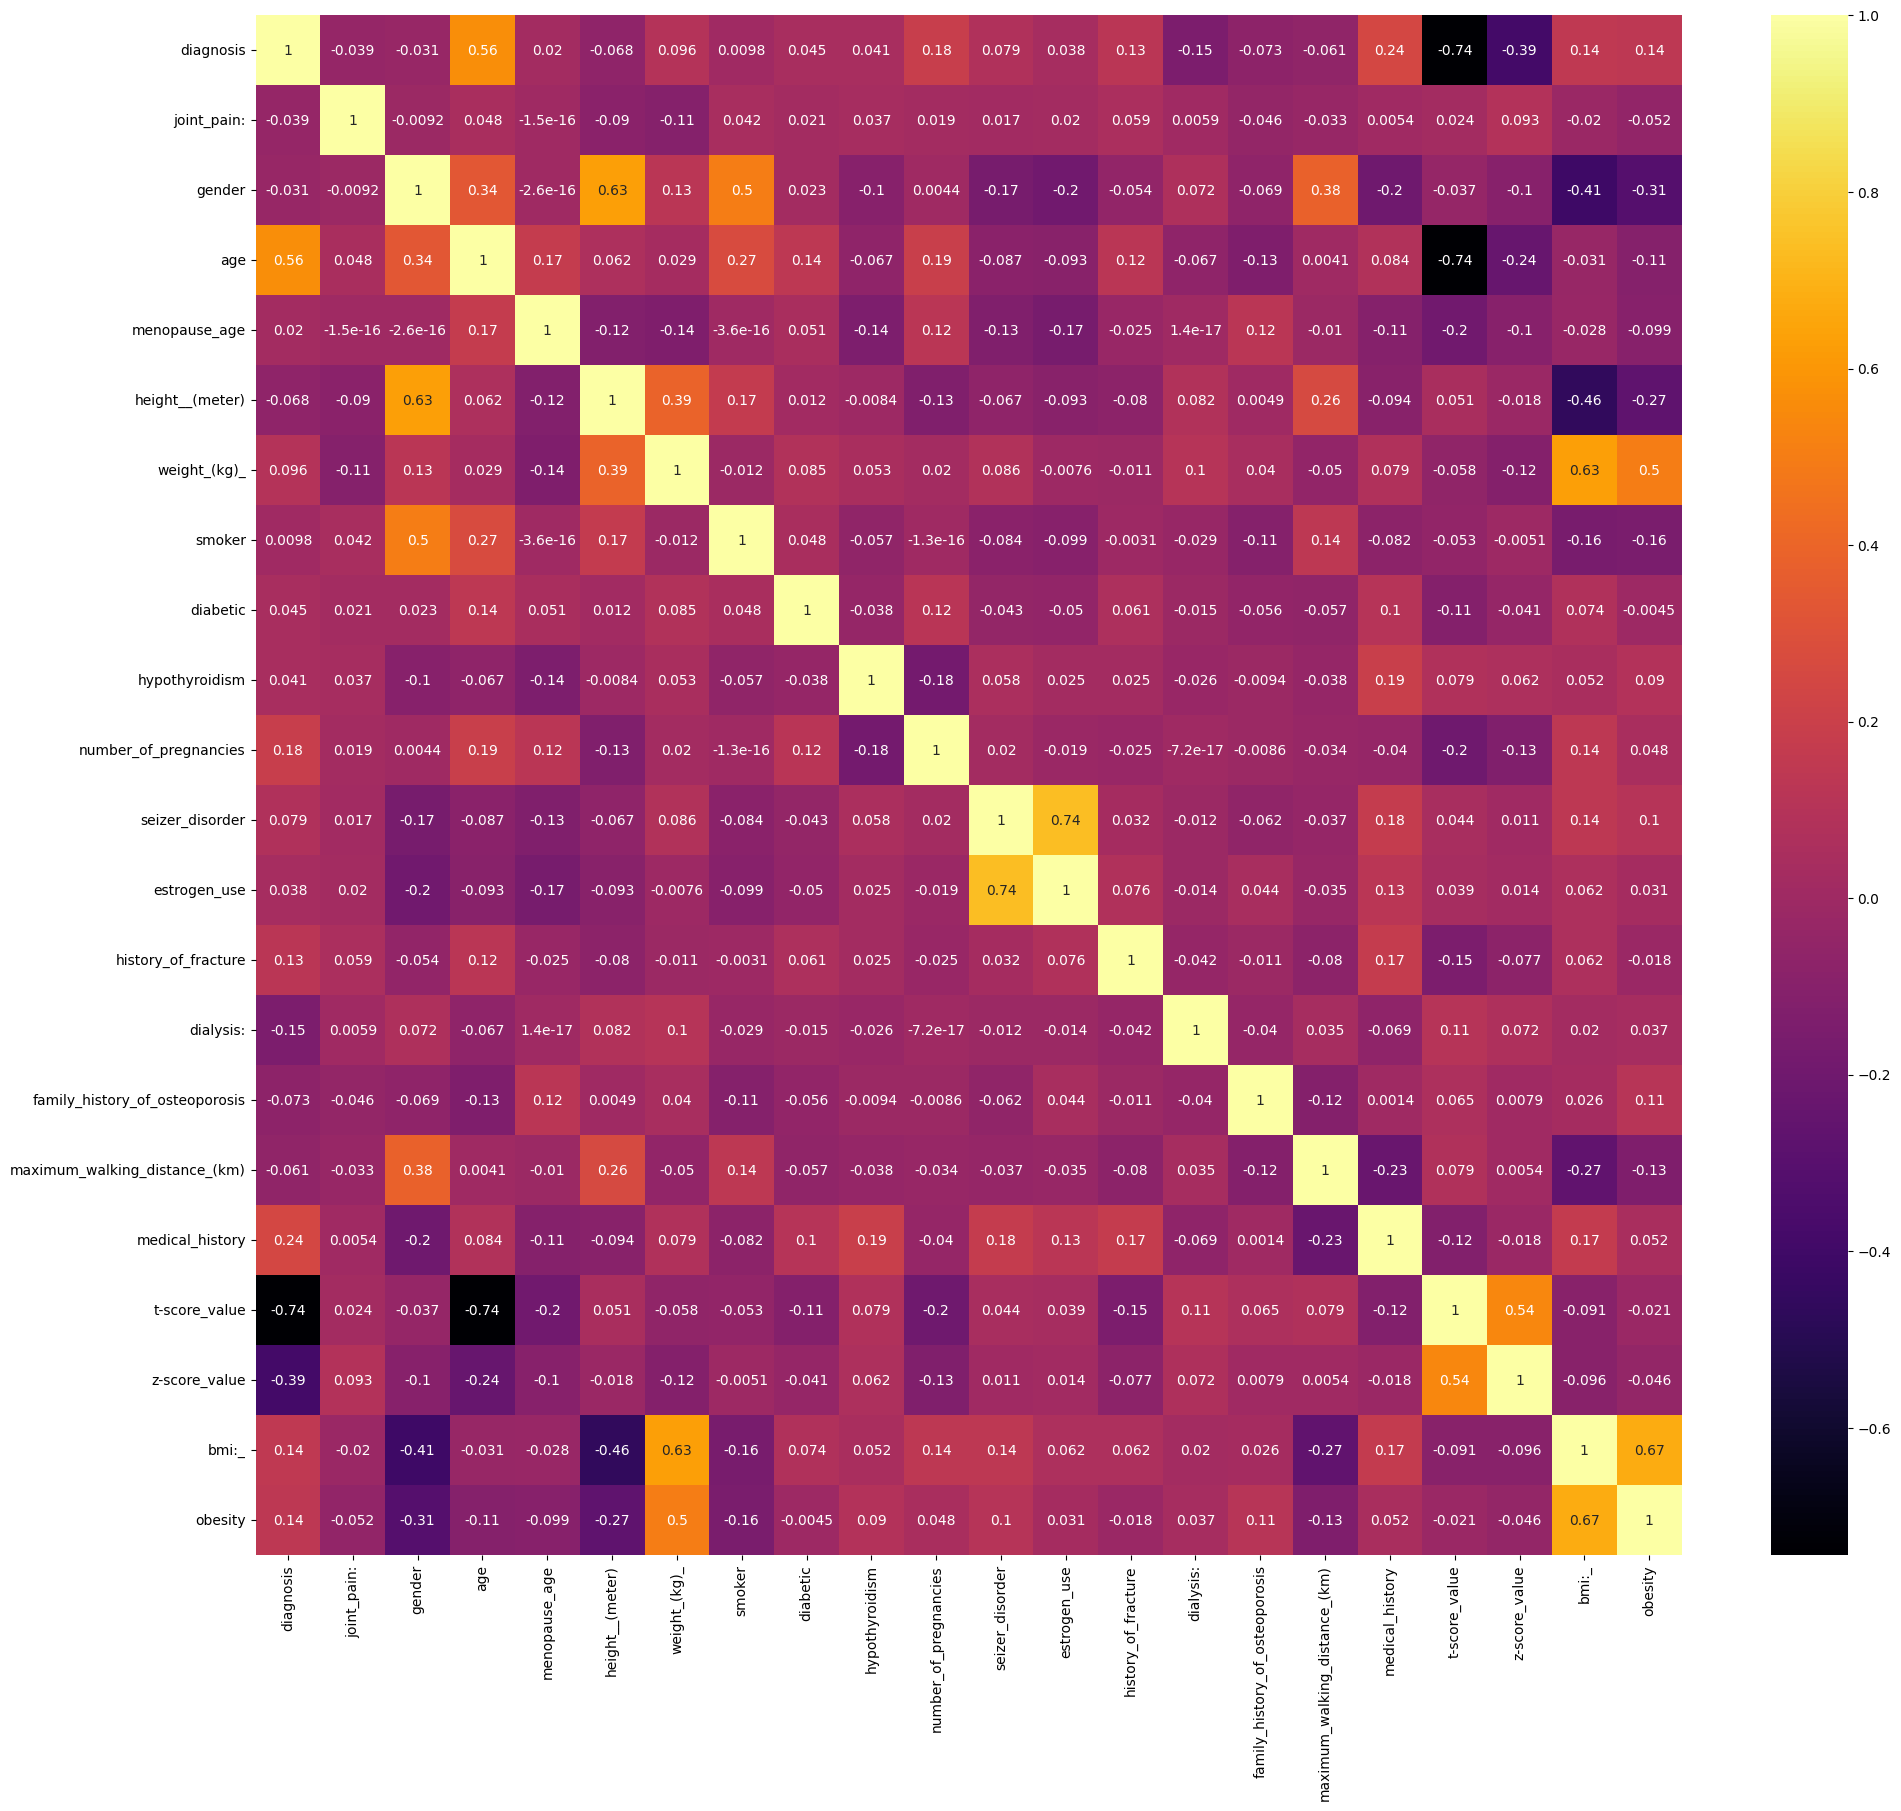

In [67]:
plt.figure(figsize=(23,20))

sns.heatmap(corr,annot = True,cmap= 'inferno')

most of my features are correlated

<Axes: >

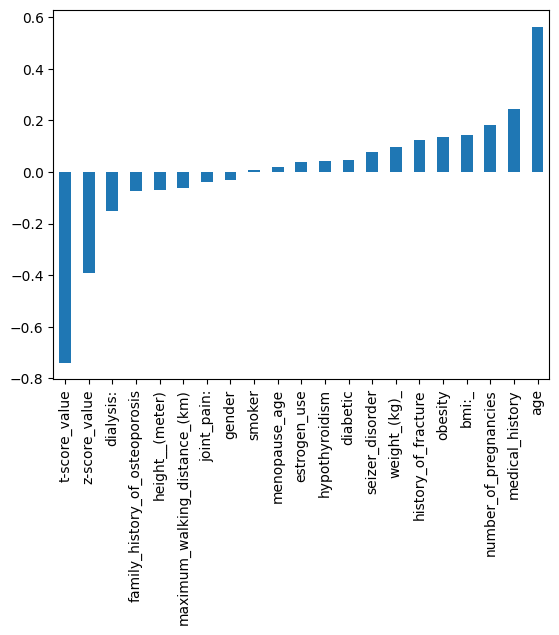

In [68]:
df.corr()['diagnosis'].sort_values().drop('diagnosis').plot(kind ='bar')

In [69]:
df['diagnosis'] = df['diagnosis'].map({1.0:'osteoporosis',0.0:'normal'})

Training myModel

In [70]:
X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
#This code initializes a MinMaxScaler to scale features of the training data and fits it to X_train, calculating the minimum and maximum values of each feature to normalize them within the default range [0, 1].

MinMaxScaler()

In [73]:
x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

# Fit the model


lgr.fit(x_train_scaled, y_train)

# Evaluate the model

y_pred_lgr = lgr.predict(x_test_scaled)

print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

      normal       1.00      0.70      0.82        10
osteoporosis       0.95      1.00      0.98        62

    accuracy                           0.96        72
   macro avg       0.98      0.85      0.90        72
weighted avg       0.96      0.96      0.96        72



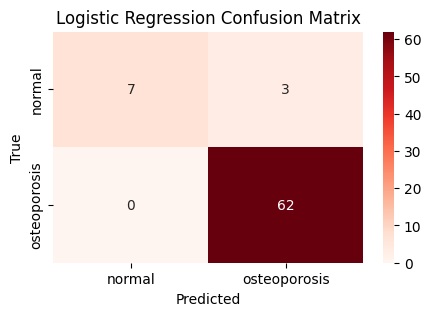

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lgr)

cm = confusion_matrix(y_test, y_pred_lgr)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['normal', 'osteoporosis'], yticklabels=['normal', 'osteoporosis'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [76]:
cv_scores_lgr = cross_val_score(lgr, x_train_scaled, y_train, cv=5)
print("Cross-validation accuracy: {:.2f} %".format(cv_scores_lgr.mean()*100))

Cross-validation accuracy: 90.50 %


In [77]:
from imblearn.under_sampling import TomekLinks,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek

def sampler_function(data_x, data_y, sampler = 0, random_state = 42):
    
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    elif sampler == 3:
        sampler = SMOTETomek()
    else: 
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)
    
    return X_transformed, y_transformed

In [78]:
X_train_res, y_train_res = sampler_function(x_train_scaled, y_train,sampler =2)

Original dataset shape: (168,)
Resample dataset shape: (282,)


In [79]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

# Fit the model


lgr.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_lgrc = lgr.predict(x_test_scaled)

print(classification_report(y_test,y_pred_lgrc))

              precision    recall  f1-score   support

      normal       0.62      1.00      0.77        10
osteoporosis       1.00      0.90      0.95        62

    accuracy                           0.92        72
   macro avg       0.81      0.95      0.86        72
weighted avg       0.95      0.92      0.92        72



In [105]:
import joblib

In [106]:
joblib.dump(lgr, 'Logistic_knee_models.pk1')

['Logistic_knee_models.pk1']

In [107]:
model_log = joblib.load( 'Logistic_knee_models.pk1')

In [108]:
model_log

LogisticRegression()

In [86]:
!pip install nbimporter

In [109]:
# Define the directory paths for each image class folder
healthy_dirs = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset/Normal'
osteoporosis_dirs = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset/Osteoporosis'

In [110]:
##  Looping through each folder with various file extensions and converting path of each image to a row 

healthy_dirs =healthy_dirs
osteoporosis_dirs=osteoporosis_dirs


filepaths = []
labels = []

dict_lists = [healthy_dirs, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteoporosis']
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

for i, dir_list in enumerate(dict_lists):
    flist = os.listdir(dir_list)  
    for f in flist:
    
        if f.lower().endswith(image_extensions):  
            fpath = os.path.join(dir_list, f)  
            filepaths.append(fpath)  
            labels.append(class_labels[i]) 


In [111]:
# Creating  a DataFrame from the file paths and labels
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)


In [112]:
knee_osteoporosis_df

,filepaths,labels
0,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
1,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
2,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
3,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
4,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
...,...,...
367,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis
368,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis
369,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis
370,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis


In [114]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assuming you have created and fit the scaler
knee_scaler = StandardScaler()
knee_scaler.fit(X_train)

# Save the scaler to a file
joblib.dump(knee_scaler, '/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Knee_scaler.pkl')

['/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Knee_scaler.pkl']

In [103]:
import os
print(os.getcwd())  # Prints the current working directory

/Users/atharvadumbre/Osteoporosis_knee_Classification-main


In [115]:
import joblib

# Load the scaler from the correct file path
knee_scaler = joblib.load('/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Knee_scaler.pkl')

In [119]:
knee_scaler

StandardScaler()

In [120]:
data = X_train.iloc[0]

In [121]:
data

joint_pain:                        1.000000
gender                             1.000000
age                               44.000000
menopause_age                     45.066265
height__(meter)                    1.615440
weight_(kg)_                      70.000000
smoker                             1.000000
diabetic                           0.000000
hypothyroidism                     0.000000
number_of_pregnancies              3.443548
seizer_disorder                    0.000000
estrogen_use                       0.000000
history_of_fracture                0.000000
dialysis:                          0.000000
family_history_of_osteoporosis     0.000000
maximum_walking_distance_(km)      8.000000
medical_history                    0.000000
t-score_value                     -0.430000
z-score_value                     -0.410000
bmi:_                             26.823557
obesity                            1.000000
Name: 29, dtype: float64

In [122]:
y_train.iloc[0]

'normal'

In [123]:
scaled_data = knee_scaler.transform([data])

In [124]:
model_log.predict(scaled_data)

array(['normal'], dtype=object)